Genre prediction using movie reviews
-------------------------------

----------------
Importing needed libraries.

In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
import random
%matplotlib inline


In [2]:
df = pd.read_csv("genres.csv",encoding='cp1252')
df.head()

,Review,AspectCategory,SentimentPolarity
0,"Confidently directed, dark, brooding, and pack...",Action,Positive
1,Nolans have given the character this great man...,Action,Positive
2,"there is action, explosions and stunt work but...",Action,Positive
3,"The acting,story,atmosphere,and actions scenes...",Action,Positive
4,I recommend it to anyone who likes action movi...,Action,Positive


In [3]:
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
df.head()

,Review,AspectCategory,SentimentPolarity
0,it is extremely entertaining and hilarious bey...,Comedy,Positive
1,The animation is some of the worst I've ever s...,Animation,Negative
2,"a fantastical love story filled with charm, wi...",Romance,Positive
3,Watch it before you die if you want to find ou...,Romance,Positive
4,The best love story I have seen in a long long...,Romance,Positive


In [5]:
df.info()TfidfVectorizerTfidfVectorizer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review             2500 non-null   object
 1   AspectCategory     2500 non-null   object
 2   SentimentPolarity  2500 non-null   object
dtypes: object(3)
memory usage: 58.7+ KB


In [6]:
genre = df['AspectCategory'].unique()
print(genre)

['Comedy' 'Animation' 'Romance' 'Action' 'Horror']


Counter({'Comedy': 500, 'Animation': 500, 'Romance': 500, 'Action': 500, 'Horror': 500})


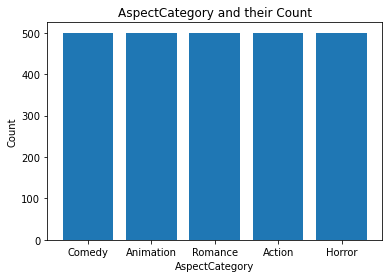

In [7]:
print(Counter(df['AspectCategory']))
plt.bar(*zip(*Counter(df['AspectCategory']).items()))
plt.xlabel("AspectCategory")
plt.ylabel("Count")
plt.title("AspectCategory and their Count")
plt.show()TfidfVectorizer

-----------
Data preprocessing

In [8]:
# function for text cleaning
def clean_text(text):
    # remove backslash-apostrophe
    text = re.sub("\'", "", text)
    # remove everything alphabets
    text = re.sub("[^a-zA-Z]"," ",text)
    # remove whitespaces
    text = ' '.join(text.split())
    # convert text to lowercase
    text = text.lower()
    
    return text

In [9]:
df['clean_review'] = df['Review'].apply(lambda x: clean_text(x))

In [10]:
df.head()

,Review,AspectCategory,SentimentPolarity,clean_review
0,it is extremely entertaining and hilarious bey...,Comedy,Positive,it is extremely entertaining and hilarious beyond
1,The animation is some of the worst I've ever s...,Animation,Negative,the animation is some of the worst ive ever seen
2,"a fantastical love story filled with charm, wi...",Romance,Positive,a fantastical love story filled with charm wit...
3,Watch it before you die if you want to find ou...,Romance,Positive,watch it before you die if you want to find ou...
4,The best love story I have seen in a long long...,Romance,Positive,the best love story i have seen in a long long...


In [11]:
df[['Review', 'clean_review']].sample(3)

,Review,clean_review
1152,I couldn't recall one joke or funny line worth...,i couldnt recall one joke or funny line worthy...
1303,bad love story,bad love story
974,it seriously should not be marked as a horror ...,it seriously should not be marked as a horror ...


In [12]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(12,15))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

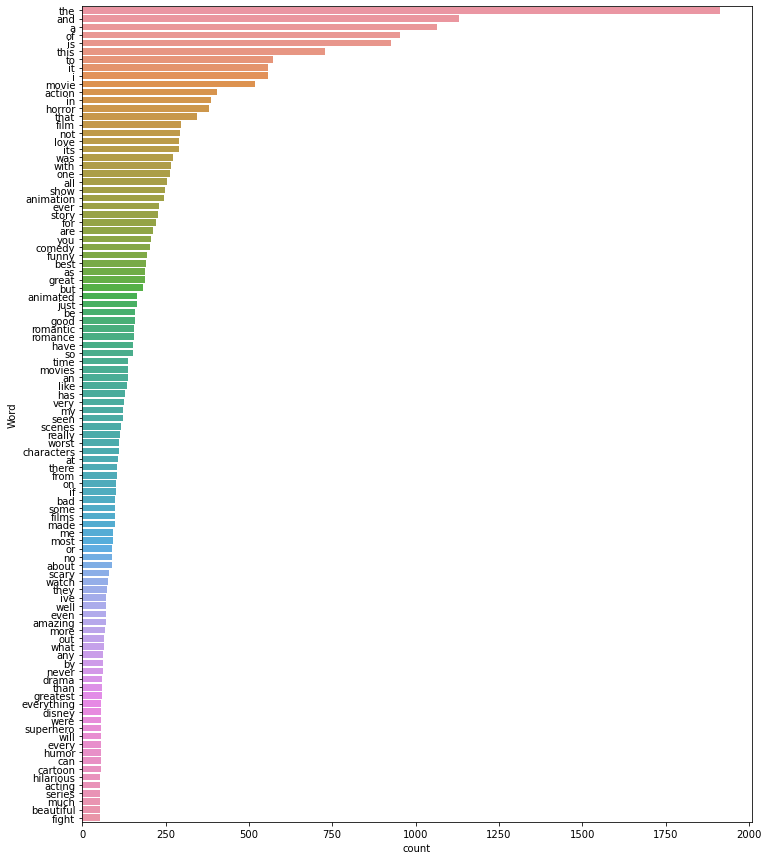

In [13]:
# print 100 most frequent words
freq_words(df['clean_review'], 100)

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/kova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
  
df['clean_review'] = df['clean_review'].apply(lambda x: remove_stopwords(x))

In [16]:
df[['Review', 'clean_review']].sample(3)

,Review,clean_review
1316,the stunts are done in service of action scene...,stunts done service action scenes dont work
1501,One of my all time favorite movies and without...,one time favorite movies without doubt favorit...
1076,Maybe the worst attempt at horror ever?,maybe worst attempt horror ever


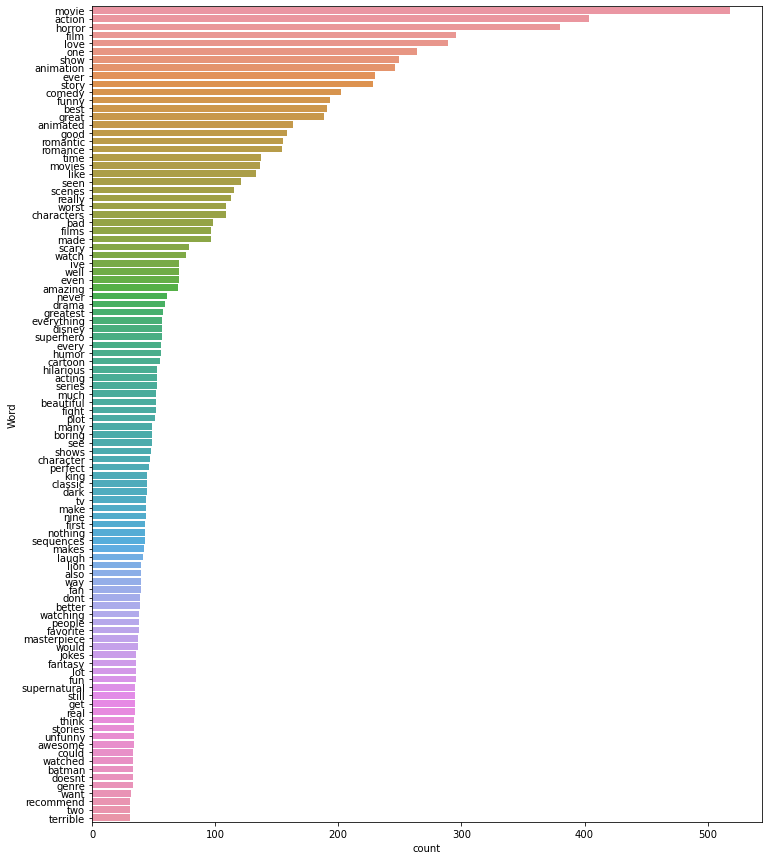

In [17]:
freq_words(df['clean_review'], 100)

In [18]:
y = df['AspectCategory'].copy()

In [19]:
y.head()

0       Comedy
1    Animation
2      Romance
3      Romance
4      Romance
Name: AspectCategory, dtype: object

In [20]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

----------------------
Training Model

In [21]:
# split dataset into training and validation set
X_train, X_test, y_train, y_test = train_test_split(df['clean_review'], y, test_size=0.2, shuffle=False)

In [22]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [24]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [25]:
# fit model on train data
clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [26]:
# make predictions for validation set
y_predicted = clf.predict(X_test_tfidf)

In [27]:
y_predicted[2]

'Comedy'

In [28]:
y_test.iloc[2]

'Comedy'

In [29]:
X_test.iloc[499]

'attempt romantic comedy falls desperately flat'

In [30]:
# evaluate performance
f1_score(y_test, y_predicted, average="micro")

0.962

In [31]:
X_test.tail()

2495                                 poorly framed action
2496    real looser like poor comedy wasting time poor...
2497                drama romance violence brotherly love
2498                     think movie closer comedy horror
2499       attempt romantic comedy falls desperately flat
Name: clean_review, dtype: object

---------------
Testing prediction 

In [32]:
for i in range(5):
    k = random.randint(0, 499)
    print("-----------------------")
    print("Review : {}".format(X_test.iloc[k]))
    print("Actual Genre : {}".format(y_test.iloc[k]))
    print("Predicted Genre : {}".format(y_predicted[k]))
    print("-----------------------")

-----------------------
Review : actors shine perfectly cast make hilarious show bring tears eyes laughing hard
Actual Genre : Comedy
Predicted Genre : Comedy
-----------------------
-----------------------
Review : use hand drawn animation computer animation together make animation look realistic
Actual Genre : Animation
Predicted Genre : Animation
-----------------------
-----------------------
Review : action boring mess
Actual Genre : Action
Predicted Genre : Action
-----------------------
-----------------------
Review : never forgotten love
Actual Genre : Romance
Predicted Genre : Romance
-----------------------
-----------------------
Review : heart comes mouth see horror joker creates
Actual Genre : Horror
Predicted Genre : Horror
-----------------------


--------------
Manual Testing 

In [33]:
def manual_testing(review) : 
    cleaned_review = clean_text(review)
    altered_review = remove_stopwords(cleaned_review)
    altered_review = [altered_review]
    testing_review = tfidf_vectorizer.transform(altered_review)
    predicted = clf.predict(testing_review)
    print("Tested Review : ", review)
    print("Predicted Genre : ", predicted)

In [34]:
manual_review = "I think the actors did a great job. Can’t wait for the sequels and the books to come to the U.S. This is a love story. Is it one we’re used to no and honestly I’m happy for that the love stories now have already been told one way or another I welcome these movies gives a new twist between 365 Days and Fifty Shades of Grey they both bring new twist and great to see something new"
manual_testing(manual_review)

Tested Review :  I think the actors did a great job. Can’t wait for the sequels and the books to come to the U.S. This is a love story. Is it one we’re used to no and honestly I’m happy for that the love stories now have already been told one way or another I welcome these movies gives a new twist between 365 Days and Fifty Shades of Grey they both bring new twist and great to see something new
Predicted Genre :  ['Romance']
